In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_ncg

In [15]:
pd.options.display.float_format = '{:20,.3f}'.format
dataFull = pd.read_csv('data/Fish.csv')
data = dataFull.loc[dataFull['Species'] == "Bream"]
sample_input = np.c_[data['Length1'], data['Length2'], data['Length3'], data['Height'], data['Width']]
sample_output = np.c_[data['Weight']]
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.000,23.200,25.400,30.000,11.520,4.020
1,Bream,290.000,24.000,26.300,31.200,12.480,4.306
2,Bream,340.000,23.900,26.500,31.100,12.378,4.696
3,Bream,363.000,26.300,29.000,33.500,12.730,4.455
4,Bream,430.000,26.500,29.000,34.000,12.444,5.134


In [16]:
X = np.c_[np.ones(sample_input.shape[0]), sample_input]
y = np.c_[sample_output]

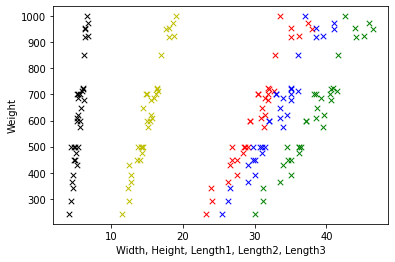

In [17]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)

plt.scatter(X[:,2], y, s=30, c='b', marker='x', linewidths=1)

plt.scatter(X[:,3], y, s=30, c='g', marker='x', linewidths=1)

plt.scatter(X[:,4], y, s=30, c='y', marker='x', linewidths=1)

plt.scatter(X[:,5], y, s=30, c='k', marker='x', linewidths=1)

plt.ylabel('Weight')
plt.xlabel('Width, Height, Length1, Length2, Length3');

In [18]:
def computeCost(theta, X, y):
    theta = theta.reshape(-1,1)
    m = y.size
    h = X.dot(theta).reshape(-1,1)

    J = 1/(2*m)*np.sum(np.square(h-y))  
    
    return(J)

In [19]:
initial_theta = np.zeros(X.shape[1])
initial_cost = computeCost(initial_theta.reshape(-1,1), X, y)
print('Initial cost: {}'.format(initial_cost))

Initial cost: 216653.0


In [20]:
def gradient(theta, X, y):
    theta = theta.reshape(-1,1)
    m = y.size
    h = X.dot(theta).reshape(-1,1)
    
    grad = (1/m)*(X.T.dot(h-y))

    return grad.flatten()

In [21]:
grad0 = gradient(initial_theta, X, y)

In [22]:
optimized = fmin_ncg(f=computeCost, x0=initial_theta, fprime=gradient, args=(X, y))
optimized

Optimization terminated successfully.
         Current function value: 797.415922
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 51
         Hessian evaluations: 0


array([-985.21286722,   20.06025498,    1.13124822,   -3.61080038,
         53.22087122,   54.03690532])

In [23]:
final_cost = computeCost(optimized.reshape(-1,1), X, y)
print('Final cost: {}'.format(final_cost))

Final cost: 797.4159219738988


In [24]:
print(X[14].dot(optimized.reshape(-1,1)))

[629.58653945]
